In [8]:
#Exploratory Analysis
#Pinterest Y2K data scraped

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"GroupData.csv", header=0)
df.head(10)
df.tail(10)
#170 rows exists in this dataset


,Theme,Price,Item Name,Item_Cat,Conversion Rate Quarterly,Profit Margin Percentage,Higher Than Average Price,After Inflation
161,CleanCore,35.0,Aloha Sweatshirt Maui Sweatshirt Beachy Sweats...,Clothing,0.02,0.47,0.0,37.0
162,CleanCore,35.0,Large Baroque pearl huggie hoop earrings,Accessories,0.02,0.45,0.0,37.0
163,CleanCore,35.0,Ways To Say I Love You Hoodie Tumblr hoodie VS...,Accessories,0.02,0.43,0.0,37.0
164,CleanCore,35.0,Cardigan with Vneck Black Dark Academy,Clothing,0.02,0.70,0.0,37.0
165,CleanCore,35.0,Crawford PantSHOPLUNAB,Clothing,0.04,0.65,0.0,37.0
166,CleanCore,39.0,Crewneck Hawaii Sweatshirt Preppy Sweatshirt C...,Clothing,0.01,0.47,0.0,41.0
167,CleanCore,54.0,High Hopes Pant,Clothing,0.03,0.42,0.0,56.0
168,CleanCore,54.9,Aesthetic Soft Girl French Mini Dress Blue SCo...,Clothing,0.02,0.35,0.0,56.9
169,CleanCore,56.0,Feels Like Sunday PantSHOPLUNAB,Clothing,0.02,0.42,1.0,58.0
170,CleanCore,75.0,Halcyon Botanic SerumVerishop,Clothing,0.04,0.43,1.0,77.0


In [14]:
#chekcing the quality of the dataset through descriptive analysis
#dtypes to check data type
#isnull().sum() to get the number of na in each collumn
def check_df(df):
    print(f"""
    #######SHAPE#######\n\n\t{df.shape}/n
    #######TYPE########\n\n{df.dtypes}/n
    #######NA##########\n\n{df.isnull().sum()}/n
    #######QUANTILES###\n\n{df.quantile([0, 0.05, 0.50, 0.75, 0.95, 0.99, 1]).T}/n
    """)
check_df(df)


    #######SHAPE#######

	(171, 8)/n
    #######TYPE########

Theme                         object
Price                        float64
Item Name                     object
Item_Cat                      object
Conversion Rate Quarterly    float64
Profit Margin Percentage     float64
Higher Than Average Price    float64
After Inflation              float64
dtype: object/n
    #######NA##########

Theme                        0
Price                        0
Item Name                    0
Item_Cat                     0
Conversion Rate Quarterly    0
Profit Margin Percentage     0
Higher Than Average Price    0
After Inflation              0
dtype: int64/n
    #######QUANTILES###

                           0.00   0.05   0.50    0.75     0.95     0.99  \
Price                      2.50  6.965  32.00  49.970  334.000  1031.20   
Conversion Rate Quarterly  0.01  0.010   0.02   0.030    0.050     0.07   
Profit Margin Percentage   0.05  0.195   0.46   0.635    0.825     2.33   
Higher Than 

In [16]:
#lets see what unique categories there are with this dataset

df['Theme'].unique
df['Theme'].value_counts()

#we have to take into account that the categories are not evenly spread as they there are more Old Money than TumblerCore
#Lets visualize this

OldMoney       30
CleanCore      27
Cottage        25
Maximalism     24
Y2K            23
Minimalism     22
TumblerCore    20
Name: Theme, dtype: int64

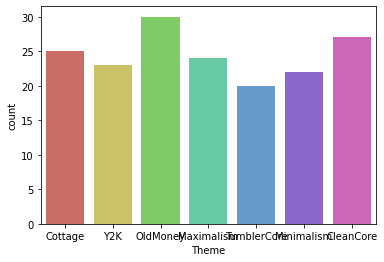

In [17]:
sns.countplot(x = "Theme", data = df, palette = 'hls')
plt.show()

In [27]:
#let's create a correlation matrix
#you need to do this for each theme

df_Cottage = df.loc[(df['Theme'] == 'Cottage')]
df_Cottage = df_Cottage.drop(['Item Name', 'Item_Cat', 'Theme'], axis =1)

In [28]:
check_df(df_Cottage)


    #######SHAPE#######

	(25, 5)/n
    #######TYPE########

Price                        float64
Conversion Rate Quarterly    float64
Profit Margin Percentage     float64
Higher Than Average Price    float64
After Inflation              float64
dtype: object/n
    #######NA##########

Price                        0
Conversion Rate Quarterly    0
Profit Margin Percentage     0
Higher Than Average Price    0
After Inflation              0
dtype: int64/n
    #######QUANTILES###

                            0.00   0.05   0.50   0.75    0.95      0.99  \
Price                      10.68  15.20  25.99  35.00  77.200  344.4800   
Conversion Rate Quarterly   0.01   0.01   0.02   0.03   0.058    0.0676   
Profit Margin Percentage    0.05   0.24   0.52   0.65   0.776    0.7800   
Higher Than Average Price   0.00   0.00   1.00   1.00   1.000    1.0000   
After Inflation            12.68  17.20  27.99  37.00  79.200  346.4800   

                             1.00  
Price                      428

In [29]:
matrix = np.corrcoef(df_Cottage)
print(matrix)

[[1.         0.9993474  0.99758364 0.99733371 0.9971453  0.99846851
  0.99860012 0.99713361 0.99655033 0.99761151 0.99747721 0.99618081
  0.99605289 0.99560097 0.9956305  0.99653422 0.99653523 0.9963722
  0.99623524 0.99578267 0.99450566 0.9940293  0.99386122 0.99400327
  0.99232314]
 [0.9993474  1.         0.99897531 0.99900443 0.99874689 0.99978799
  0.99982617 0.99889855 0.99867527 0.99944629 0.99936693 0.99838861
  0.99832416 0.99812009 0.99817143 0.9988776  0.99881294 0.99878369
  0.99867719 0.9984015  0.99751202 0.99720602 0.99710736 0.99724594
  0.99609534]
 [0.99758364 0.99897531 1.         0.99995273 0.9999481  0.99886051
  0.99930623 0.9999307  0.99974008 0.99917749 0.99920231 0.99964717
  0.9995984  0.99937625 0.9993557  0.9988969  0.99908206 0.99885414
  0.99891759 0.99878179 0.99874229 0.99846685 0.99834941 0.99806848
  0.99719348]
 [0.99733371 0.99900443 0.99995273 1.         0.99992891 0.99907888
  0.9994231  0.99999009 0.99989906 0.99944146 0.9994642  0.99979429
  0.999

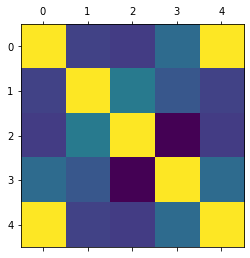

In [31]:
plt.matshow(df_Cottage.corr())
plt.show()

In [32]:
corr = df_Cottage.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Conversion Rate Quarterly,Profit Margin Percentage,Higher Than Average Price,After Inflation
Price,1.000000,-0.009043,-0.033309,0.183804,1.000000
Conversion Rate Quarterly,-0.009043,1.000000,0.261843,0.084067,-0.009043
Profit Margin Percentage,-0.033309,0.261843,1.000000,-0.257711,-0.033309
Higher Than Average Price,0.183804,0.084067,-0.257711,1.000000,0.183804
After Inflation,1.000000,-0.009043,-0.033309,0.183804,1.000000


In [37]:
#not much to analyze since there is no correlation there is no point in analyzing further in this case
#We can try analyzing the item category instead of the Theme
#What items category occurs the most
#What is the most expensive Item theme
top_10_Cheapest = df.sort_values(by=['Price']).head(15)


(0.0, 30.0)

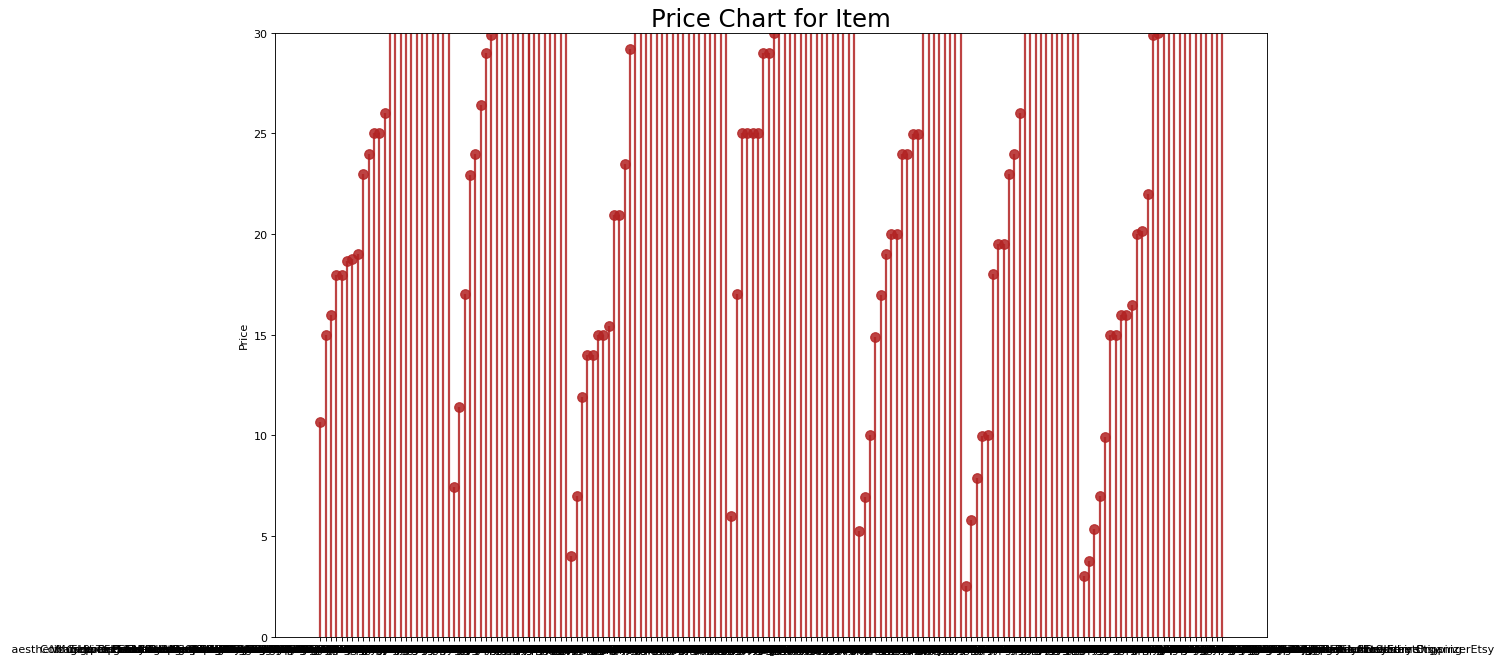

In [42]:
fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.vlines(x=df['Item Name'], ymin=0, ymax=df.Price, color='firebrick', alpha=.85, linewidth=2)
ax.scatter(x=df['Item Name'], y=df.Price, s=75, color='firebrick', alpha=.85)

ax.set_title('Price Chart for Item', fontdict={'size':22})
ax.set_ylabel('Price')
ax.set_xticks(df["Item Name"])
ax.set_ylim(0, 30)

(0.0, 30.0)